In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train/cat.jpg


In [2]:
import tensorflow 
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2026-01-20 09:52:01.294404: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768902721.610942      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768902721.699061      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768902722.572175      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768902722.572260      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768902722.572263      17 computation_placer.cc:177] computation placer alr

In [3]:
img  = image.load_img("/kaggle/input/train/cat.jpg",target_size=(200,200))

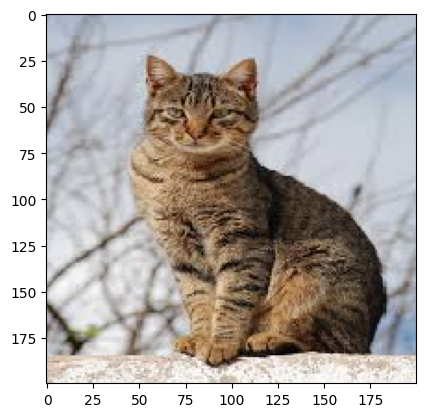

In [4]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [5]:
datagen = ImageDataGenerator(
    rotation_range = 40,#angle,randomly rotate img btw angle -40 deg to +40 deg
    width_shift_range = 0.2, #move img left or right horizontally
    height_shift_range = 0.2, # moves img up and down vertically 
    shear_range = 0.2, #distortion/tilt
    zoom_range = 0.2,#random zoom in zoom put
    horizontal_flip = True , #flip images left <-> right 
    fill_mode = 'nearest' # while rotation/shift/shear empty cells appear , so fill empty cells using nearest existing pixel values
)

In [6]:
img = image.img_to_array(img)

In [7]:
img.shape

(200, 200, 3)

In [8]:
input_batch = img.reshape(1,200,200,3)

In [9]:
import os
save_dir = '/kaggle/working/aug'
os.makedirs(save_dir,exist_ok=True)

In [10]:
i=0 
for output in datagen.flow(input_batch,batch_size=1,save_to_dir = save_dir) :
    i=i+1
    if i == 10 :
        break
